In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
data=pd.read_csv("day.csv")
pd.set_option('display.max_columns',None)
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [283]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [284]:
data["season"]=data["season"].astype("category")
data["weathersit"]=data["weathersit"].astype("category")

data.dtypes

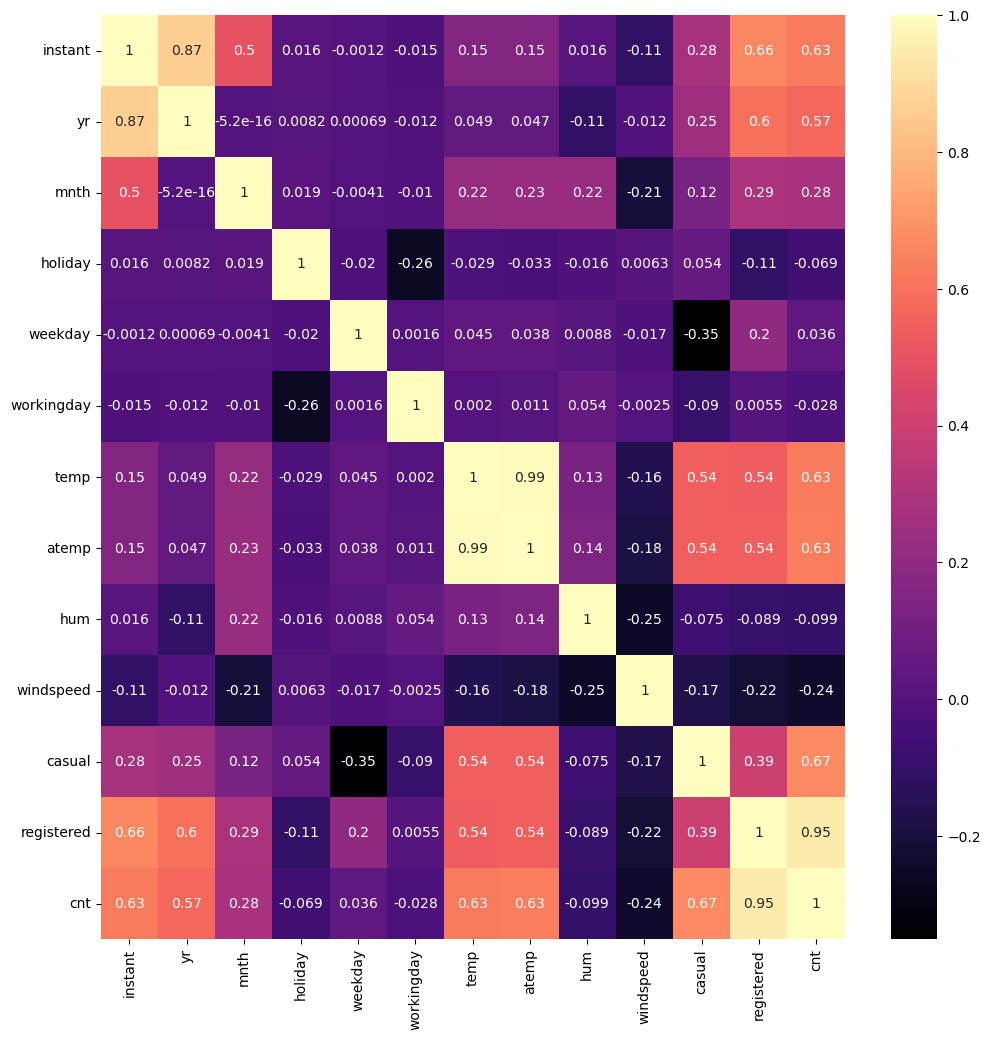

In [286]:
plt.figure(figsize=(12,12))
cor=data.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap=plt.cm.magma)
plt.show()

In [287]:
cor_target=abs(cor["cnt"])
relevant_features=cor_target[cor_target>0.3]
relevant_features

instant       0.629896
yr            0.569728
temp          0.627044
atemp         0.630685
casual        0.672123
registered    0.945411
cnt           1.000000
Name: cnt, dtype: float64

In [288]:
print(data[["yr","temp"]].corr())
print(data[["temp","atemp"]].corr())
print(data[["atemp","casual"]].corr())
print(data[["casual","registered"]].corr())

            yr      temp
yr    1.000000  0.048789
temp  0.048789  1.000000
           temp     atemp
temp   1.000000  0.991696
atemp  0.991696  1.000000
           atemp    casual
atemp   1.000000  0.543362
casual  0.543362  1.000000
              casual  registered
casual      1.000000    0.394137
registered  0.394137    1.000000


<Axes: xlabel='hum', ylabel='atemp'>

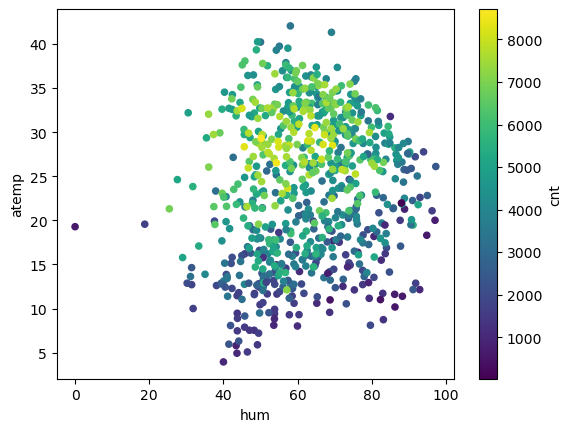

In [289]:
data.plot.scatter(x='hum',
                      y='atemp',
                      c='cnt',
                      colormap='viridis')

<Axes: xlabel='season'>

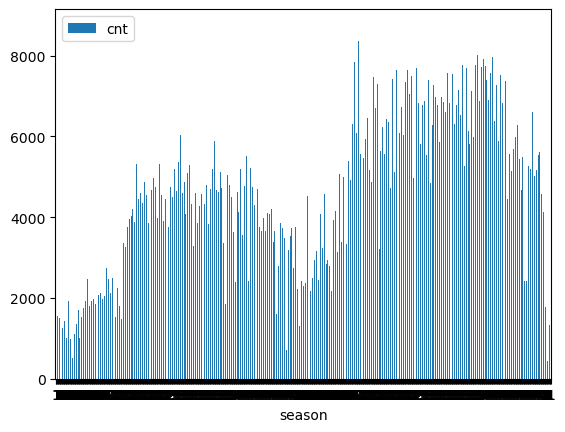

In [290]:
data.plot.bar(x='season', y='cnt', rot=0)

sns.pairplot(data, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt'])
plt.show()

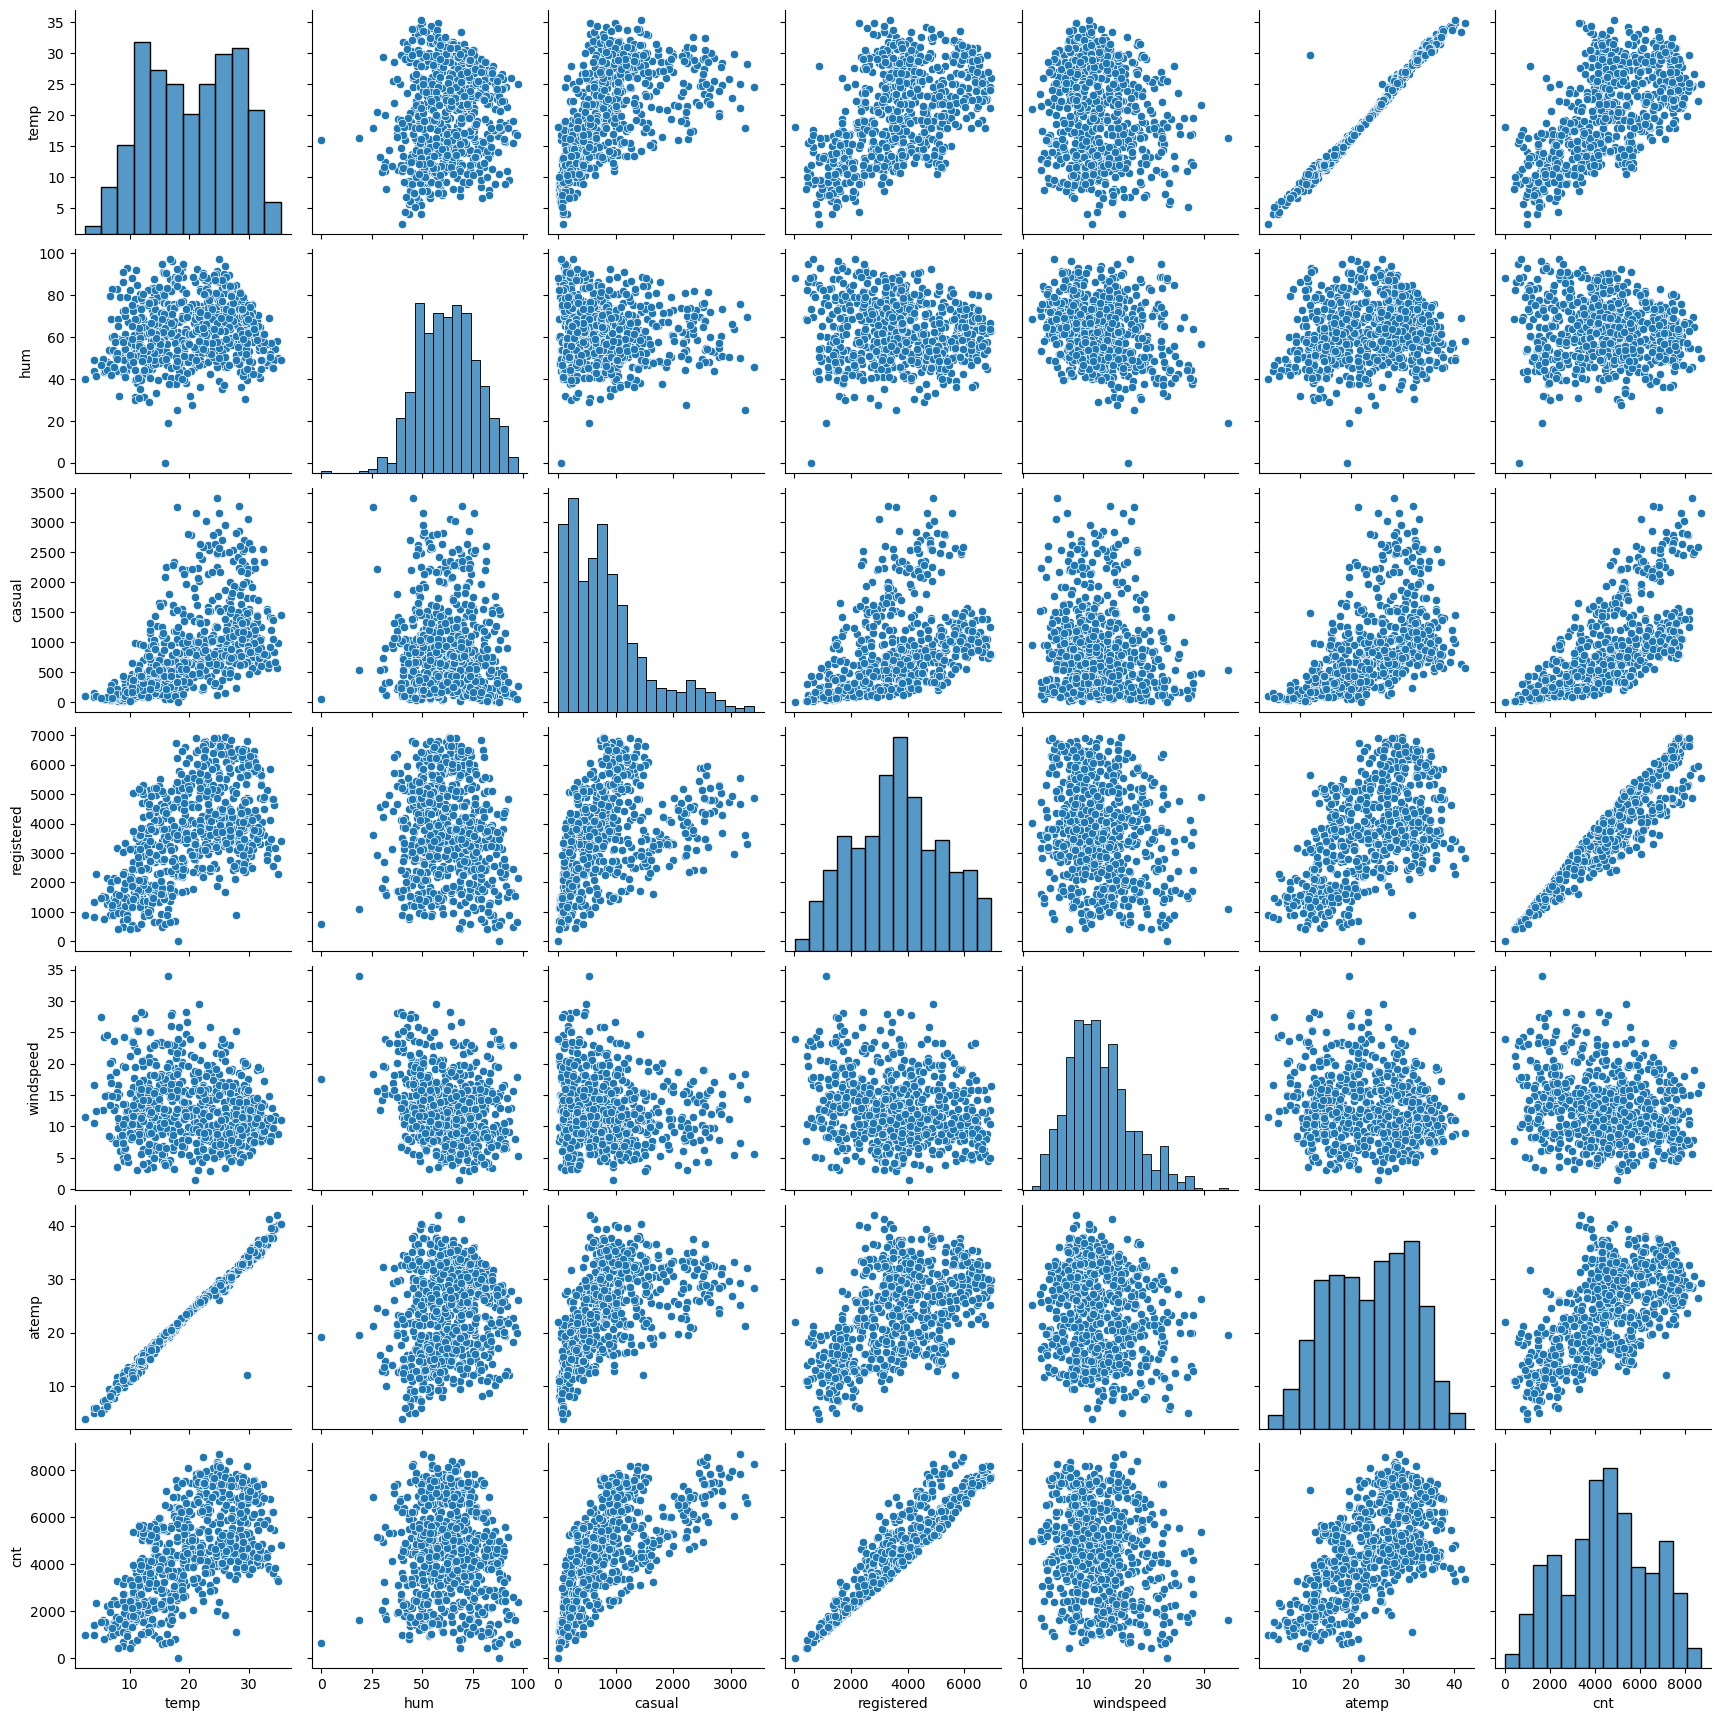

In [292]:
sns.pairplot(data, vars=['temp', 'hum', 'casual', 'registered', 'windspeed', 'atemp', 'cnt'])
plt.show()

In [293]:
data['season']=data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
data['mnth']=data.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data['weathersit']=data.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow+ Fog'})
data['weekday']=data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [294]:
months=pd.get_dummies(data.mnth,drop_first=True,dtype=int)
weekdays=pd.get_dummies(data.weekday,drop_first=True,dtype=int)
weather_sit=pd.get_dummies(data.weathersit,drop_first=True,dtype=int)
seasons=pd.get_dummies(data.season,drop_first=True,dtype=int)

In [295]:
data=pd.concat([months,weekdays,weather_sit,seasons,data],axis=1)
data.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist + Cloudy,Light Snow,summer,fall,winter,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [296]:
data.drop(['season','mnth','weekday','weathersit','dteday','hum','holiday', 'windspeed'], axis = 1, inplace = True)
data.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist + Cloudy,Light Snow,summer,fall,winter,instant,yr,workingday,temp,atemp,casual,registered,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,14.110847,18.18125,331,654,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,0,1,14.902598,17.68695,131,670,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,1,8.050924,9.47025,120,1229,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,1,8.200000,10.60610,108,1454,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,9.305237,11.46350,82,1518,1600


In [297]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=100)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars=['temp','cnt']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])
data_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist + Cloudy,Light Snow,summer,fall,winter,instant,yr,workingday,temp,atemp,casual,registered,cnt
367,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,368,1,1,0.113228,6.31375,89,2147,0.254717
648,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,649,1,1,0.468352,21.55835,834,6736,0.868385
44,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,45,0,1,0.443431,19.91750,208,1705,0.217556
705,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,706,1,0,0.326094,16.09790,349,4659,0.573631
379,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,380,1,1,0.133996,8.08125,284,2027,0.263346


In [298]:
y_train = data_train.pop('cnt')
X_train = data_train

In [299]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe=RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [300]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) 

[('Aug', False, 13),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', True, 1),
 ('Mar', False, 5),
 ('May', False, 10),
 ('Nov', False, 2),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', False, 3),
 ('Thu', False, 4),
 ('Tue', False, 11),
 ('Wed', False, 14),
 ('Mist + Cloudy', False, 9),
 ('Light Snow', True, 1),
 ('summer', True, 1),
 ('fall', False, 7),
 ('winter', True, 1),
 ('instant', False, 15),
 ('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('casual', True, 1),
 ('registered', True, 1)]

In [301]:
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Feb', 'Jan', 'July', 'June', 'Sep', 'Sat', 'Light Snow',
       'summer', 'winter', 'yr', 'workingday', 'temp', 'casual', 'registered'],
      dtype='object')

In [302]:
train_rfe = X_train[col]
train_rfe=pd.concat([train_rfe, X_train[['Mist + Cloudy']]], axis=1)

In [303]:
import statsmodels.api as sm
x_training=sm.add_constant(train_rfe)

In [304]:
model=sm.OLS(y_train, train_rfe).fit()

In [305]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.199e+07
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:29:50   Log-Likelihood:                          3704.0
No. Observations:                 584   AIC:                                     -7376.
Df Residuals:                     568   BIC:                                     -7306.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [306]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X1 = train_rfe
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,registered,26.86
12,temp,23.16
10,yr,5.18
11,workingday,5.16
13,casual,4.96
9,winter,2.45
8,summer,2.19
6,Sat,1.76
15,Mist + Cloudy,1.75
3,July,1.65


In [307]:
X_train_rf=train_rfe.drop(['July','Dec','Feb', 'Jan', 'June', 'casual'], axis=1)

In [308]:
X_train_model1 = sm.add_constant(X_train_rf)
model1 = sm.OLS(y_train,X_train_model1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     875.1
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:29:50   Log-Likelihood:                 856.61
No. Observations:                 584   AIC:                            -1691.
Df Residuals:                     573   BIC:                            -1643.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0196      0.009      2.150

In [309]:
X_train_rfe = X_train_model1.drop(['registered'], axis=1)

In [310]:
vif = pd.DataFrame()
X =X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.17
7,workingday,1.58
2,Sat,1.57
4,summer,1.19
5,winter,1.17
8,temp,1.14
1,Sep,1.10
9,Mist + Cloudy,1.04
3,Light Snow,1.03
6,yr,1.01


In [311]:
X_train_model2 = sm.add_constant(X_train_rfe)
model2 = sm.OLS(y_train,X_train_model2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     284.8
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          3.45e-205
Time:                        11:29:50   Log-Likelihood:                 538.06
No. Observations:                 584   AIC:                            -1056.
Df Residuals:                     574   BIC:                            -1012.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0471      0.016      3.011

In [312]:
X_train_rfe1 = X_train_model2.drop('temp', axis=1)

In [313]:
X_train_model3 = sm.add_constant(X_train_rfe1)
model3 = sm.OLS(y_train,X_train_model3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     73.24
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           9.84e-83
Time:                        11:29:50   Log-Likelihood:                 247.26
No. Observations:                 584   AIC:                            -476.5
Df Residuals:                     575   BIC:                            -437.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3564      0.020     17.847

In [314]:
y_train_pred=model3.predict(X_train_model3)

In [315]:
print(y_train_pred)

367    0.601887
648    0.699902
44     0.354744
705    0.623429
379    0.601887
         ...   
578    0.601887
53     0.354744
350    0.350927
79     0.386971
520    0.634114
Length: 584, dtype: float64


<Figure size 640x480 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

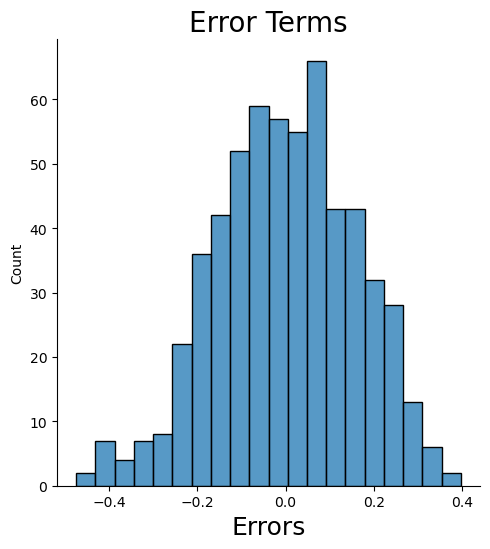

In [316]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.displot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [317]:
X_train_rfe1

,const,Sep,Sat,Light Snow,summer,winter,yr,workingday,Mist + Cloudy
367,1.0,0,0,0,0,0,1,1,0
648,1.0,0,0,0,0,1,1,1,0
44,1.0,0,0,0,0,0,0,1,0
705,1.0,0,1,0,0,1,1,0,1
379,1.0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,1,1,0
53,1.0,0,0,0,0,0,0,1,0
350,1.0,0,0,0,0,1,0,1,1
79,1.0,0,0,0,1,0,0,1,1


In [318]:
num_vars=['temp','cnt']
data_test[num_vars] = scaler.transform(data_test[num_vars])
data_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist + Cloudy,Light Snow,summer,fall,winter,instant,yr,workingday,temp,atemp,casual,registered,cnt
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,185,0,0,0.831783,33.27085,3065,2978,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,536,1,1,0.901354,36.04875,872,5339,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,300,0,0,0.511964,22.85230,240,2419,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,222,0,1,0.881625,34.24915,884,3896,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,153,0,0,0.817246,32.19710,736,4232,0.569029


In [319]:
y_test = data_test.pop('cnt')
X_test = data_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist + Cloudy,Light Snow,summer,fall,winter,instant,yr,workingday,temp,atemp,casual,registered
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.00000
mean,0.061644,0.075342,0.089041,0.075342,0.123288,0.102740,0.061644,0.075342,0.089041,0.054795,0.089041,0.095890,0.232877,0.191781,0.130137,0.082192,0.164384,0.315068,0.034247,0.273973,0.280822,0.219178,343.595890,0.445205,0.547945,0.569603,24.627616,858.561644,3660.40411
std,0.241335,0.264852,0.285783,0.264852,0.329899,0.304664,0.241335,0.264852,0.285783,0.228362,0.285783,0.295454,0.424119,0.395057,0.337612,0.275602,0.371899,0.466142,0.182488,0.447530,0.450948,0.415114,208.201513,0.498699,0.499409,0.238088,8.460826,734.823356,1413.44801
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.046591,4.941955,34.000000,472.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,161.750000,0.000000,0.000000,0.359075,17.160963,305.500000,2782.25000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,324.000000,0.000000,1.000000,0.560248,24.700000,705.500000,3683.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,524.500000,1.000000,1.000000,0.801929,32.268162,1090.500000,4533.25000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,728.000000,1.000000,1.000000,0.984424,41.318550,3410.000000,6640.00000


In [320]:
X_train_model3 = X_train_model3.drop(columns='const')
X_train_model3.columns

Index(['Sep', 'Sat', 'Light Snow', 'summer', 'winter', 'yr', 'workingday',
       'Mist + Cloudy'],
      dtype='object')

In [321]:
X_test_new = X_test[X_train_model3.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Sat,Light Snow,summer,winter,yr,workingday,Mist + Cloudy
184,1.0,0,0,0,0,0,0,0,1
535,1.0,0,0,0,1,0,1,1,0
299,1.0,0,1,0,0,1,0,0,1
221,1.0,0,0,0,0,0,0,1,0
152,1.0,0,1,0,1,0,0,0,0


In [322]:
y_pred = model3.predict(X_test_new1)

In [323]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_train_pred:", y_train_pred.shape)

Shape of y_test: (146,)
Shape of y_train_pred: (584,)


In [324]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5123339733006408

In [325]:
Adj_r2=1-(1-0.4004498)*(11-1)/(11-1-1)
print(Adj_r2)

0.33383311111111125


Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

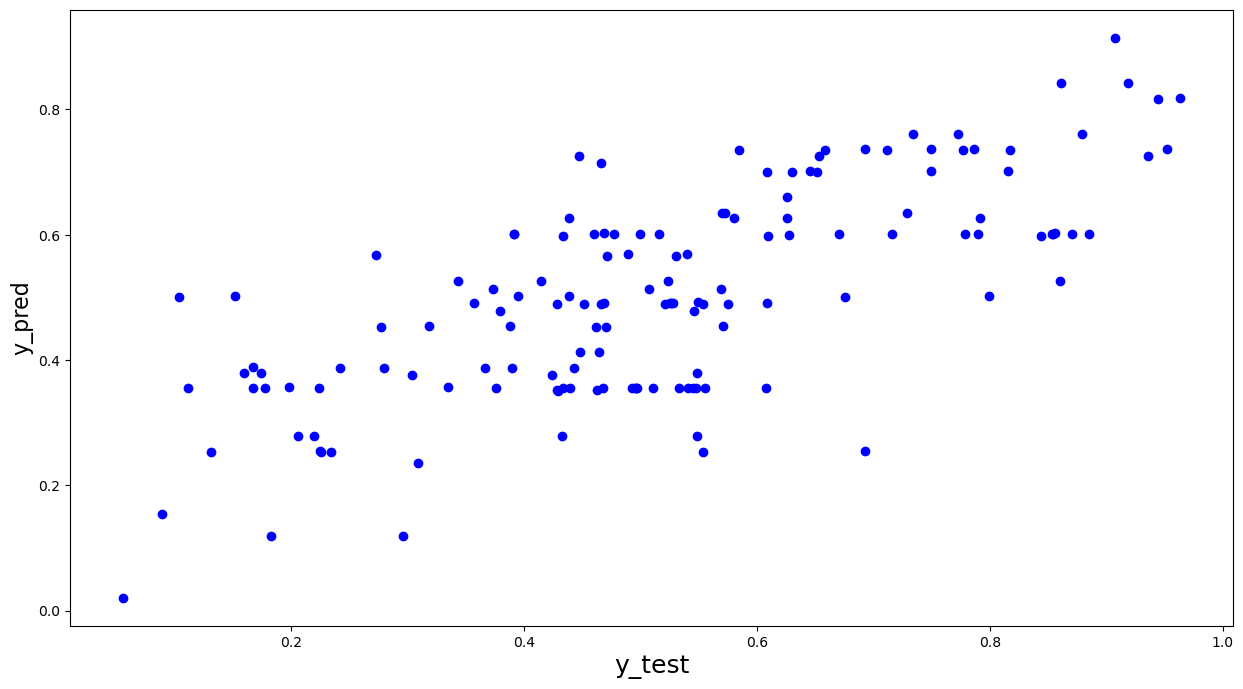

In [326]:
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          

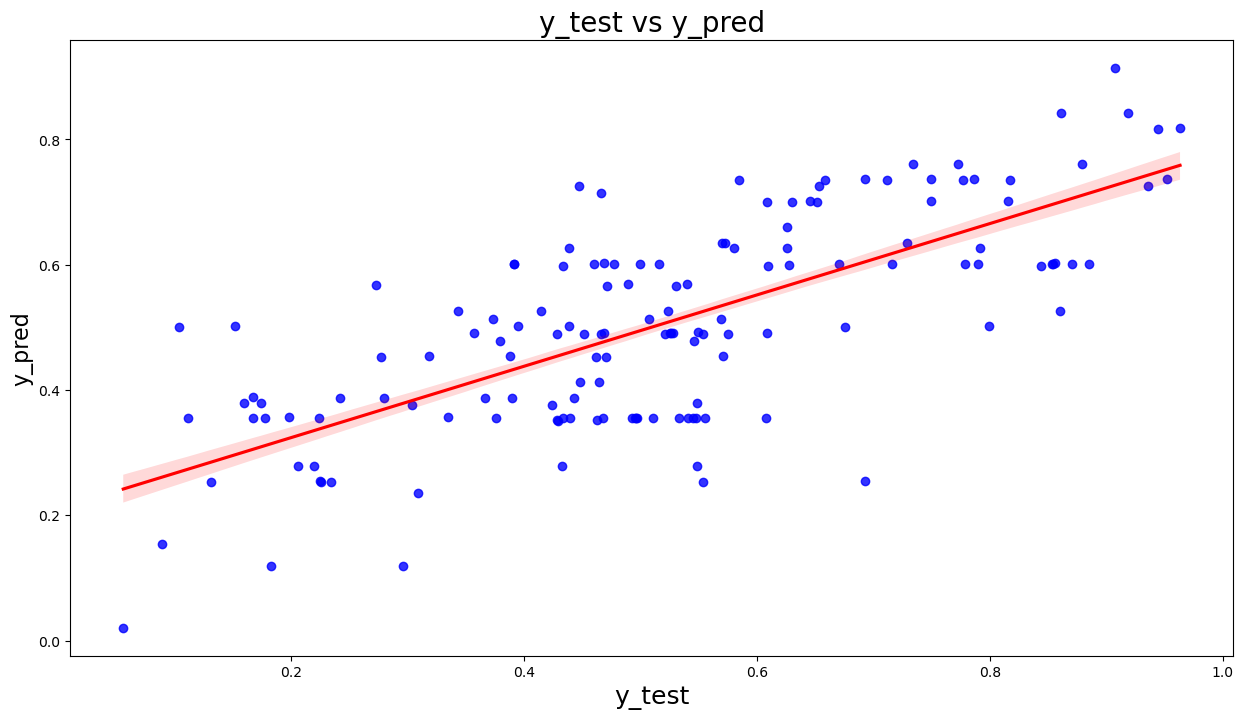

In [327]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [328]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# Assuming y_test and y_pred are defined
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)), 4)
print(RMSE)

0.1481


In [329]:
from sklearn.metrics import mean_absolute_error

# Assuming y_test and y_pred are defined
MAE = round(mean_absolute_error(y_test, y_pred), 4)
print(MAE)

0.1184


In [330]:
"""1. get_dummies
2. scaling
    1. MinMaxScaler
    2. Standardization
3. import statsModel.API - calculate ordinary least square(OLs), has no constant(C) i.e. as in y=mx+c
    sm.add_constant(training)
    sm.OLs
    result.summary
4. VIF(Variation Inflation Factor) - will tell you multi-correality
5. RFE(Recursive Feature Engineering) - gives the best features 
    RFE(no_of_features)
Make a function(OLs)
make a function(VIF>5)
RFE[15]
"""

'1. get_dummies\n2. scaling\n    1. MinMaxScaler\n    2. Standardization\n3. import statsModel.API - calculate ordinary least square(OLs), has no constant(C) i.e. as in y=mx+c\n    sm.add_constant(training)\n    sm.OLs\n    result.summary\n4. VIF(Variation Inflation Factor) - will tell you multi-correality\n5. RFE(Recursive Feature Engineering) - gives the best features \n    RFE(no_of_features)\nMake a function(OLs)\nmake a function(VIF>5)\nRFE[15]\n'